# Object Detection  - YOLO & OWL-ViT
This tutorial demonstrates how to use YOLO (You Only Look Once) from the [Ultralytics](https://github.com/ultralytics/yolov5) library for object detection. It includes steps for:

- Running object detection inference on images/videos
- Fine-tuning YOLO for custom datasets
- Comparing YOLO with OWl-VIT for zero-shot learning.


## 1. Perform Object Detection Inference
First thing We'll use YOLOv8 from Ultralyics for object detection on a sample image.
We aim to utilize the pre-trained YOLOv8 model to detect objects in a sample image. This involves loading the model, providing an image for input, and interpreting the model's predictions.

**Key Concepts:**
- **Inference**: The process of using a trained model to make predictions on new data.
- **YOLOv8**: A state-of-the-art version of the YOLO (You Only Look Once) architecture, known for its speed and accuracy in object detection tasks.

**Steps:**
1. Load the YOLOv8 model using the Ultralytics library.
2. Perform inference on a sample image to detect objects.
3. Visualize the results, including bounding boxes and class labels.

**Support Material:**
- https://docs.ultralytics.com/models/yolov8/
- https://docs.ultralytics.com/tasks/detect/

In [27]:
# sudo apt update
# sudo apt install -y libgl1-mesa-glx
import cv2
print(cv2.__version__)

4.10.0


In [28]:
# Import YOLO and load a pre-trained model
from ultralytics import YOLO
import cv2

# Load the YOLOv8 pre-trained model
model = YOLO('yolov8n.pt')  # nano model for quick inference

# Run inference on a sample image

results = model('images/street_scene.jpg', save = False)  # Displays image with detections

for result in results:
    print(result.boxes)  # Boxes object for bounding box outputs


image 1/1 /workspaces/MultimodalInteraction_ObjDet/images/street_scene.jpg: 384x640 13 persons, 1 bicycle, 9 cars, 2 motorcycles, 1 traffic light, 1 bench, 4 birds, 1 handbag, 1 potted plant, 79.3ms
Speed: 1.6ms preprocess, 79.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 2.,  0.,  0.,  0., 58.,  0.,  2.,  9.,  0., 14.,  0.,  3.,  0.,  1.,  2., 14., 14.,  2.,  0.,  2.,  2.,  0.,  0., 26.,  0.,  3.,  2.,  0.,  0.,  2., 14., 13.,  2.])
conf: tensor([0.9098, 0.9041, 0.9005, 0.8934, 0.8477, 0.8331, 0.8173, 0.7737, 0.7585, 0.7313, 0.6779, 0.6606, 0.6198, 0.5686, 0.5105, 0.5057, 0.5043, 0.4675, 0.4564, 0.4517, 0.4201, 0.4165, 0.4037, 0.4015, 0.3767, 0.3745, 0.3659, 0.3221, 0.3095, 0.3049, 0.2999, 0.2989, 0.2811])
data: tensor([[9.5592e-01, 3.6429e+02, 6.0592e+02, 6.1893e+02, 9.0984e-01, 2.0000e+00],
        [1.1789e+03, 4.2397e+02, 1.4806e+03, 8.6406e+02, 9.0414e-01, 0.0000e+00],
        [1.5657e+

## 2. Fine-Tuning YOLO on Custom Dataset
Fine-tuning YOLO requires a dataset formatted in the YOLO format. We'll use a small public dataset for demonstration.
We will adapt the pre-trained YOLO model to a custom dataset. This process, known as fine-tuning, enables YOLO to specialize in detecting specific objects not included in its original training.

**Key Concepts:**
- **Fine-tuning**: Adapting a pre-trained model to new data by continuing the training process.
- **Custom Dataset**: A dataset that contains specific objects relevant to a new application, different from those YOLO was trained on (e.g. https://docs.ultralytics.com/datasets/detect/signature/.)

**Steps:**
1. Prepare the custom dataset by organizing images and labels in the required format.
2. Configure the YOLO training pipeline.
3. Train the model and evaluate its performance.

**Support Material:** 
- https://docs.ultralytics.com/modes/train/
- https://docs.ultralytics.com/modes/val/




In [29]:
# Download a sample dataset (e.g., Signature)
# !wget -q https://github.com/ultralytics/assets/releases/download/v0.0.0/signature.zip


In [30]:
# Prüfung nach dem Download
!ls -lh signature.zip
# !unzip -q signature.zip -d ./datasets

-rw-rw-rw- 1 vscode vscode 12M Jul 10 14:25 signature.zip


In [34]:
# Train YOLO on the dataset
results = model.train(data='./datasets/signature.yaml', epochs=10, imgsz=640, batch=16)

New https://pypi.org/project/ultralytics/8.3.48 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.39 🚀 Python-3.10.15 torch-2.5.1+cu124 CPU (Intel Xeon Platinum 8370C 2.80GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=./datasets/signature.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, 

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /workspaces/MultimodalInteraction_ObjDet/datasets/signature/train/labels.cache... 143 images, 0 backgrounds, 0 corrupt: 100%|██████████| 143/143 [00:00<?, ?it/s]
val: Scanning /workspaces/MultimodalInteraction_ObjDet/datasets/signature/valid/labels.cache... 35 images, 0 backgrounds, 0 corrupt: 100%|██████████| 35/35 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train4
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      2.675      5.159      2.681         16        640:  11%|█         | 1/9 [00:08<01:10,  8.83s/it]

: 

In [ ]:
model = YOLO("runs/detect/train12/weights/best.pt")  # load a custom model, check the path depending on your output before!!

# Predict with the model
results = model.predict("images/example_signature.jpg", conf=0.75) #check params if you need to improve detection

## 3. Zero-Shot Learning with OWL-ViT
Switch to `OWL-ViT` to see how it performs with zero-shot learning capabilities. Zero-shot means detecting objects without prior specific training.

OWL-ViT (Open Vocabulary Learning with Vision Transformers) is a cutting-edge model designed for open vocabulary object detection. Unlike traditional models, OWL-ViT combines vision transformers with text embeddings, enabling it to:\n\n
- Understand textual descriptions of objects, even if it hasn't seen them during training.
- Detect and classify objects based on descriptive input, making it suitable for diverse applications.
- Perform zero-shot learning by generalizing to new object classes without additional training.\n\n"

**Steps in Using OWL-ViT:**
1. Model Initialization**: Set up the OWL-ViT model.
2. Text Input for Object Descriptions: Provide descriptive prompts (e.g., 'a red car' or 'a black cat to guide detection.
3. Inference and Visualization: Process an image or video, detect objects based on text descriptions and visualize results.\n\n"

OWL-ViT excels in scenarios where predefined object classes are insufficient, such as detecting rare or domain-specific objects.

**Support Material**:
- https://huggingface.co/docs/transformers/en/model_doc/owlvit


/home/vscode/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/vscode/.local/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


[{'score': 0.3334088623523712, 'label': 'a person on the floor', 'box': {'xmin': 584, 'ymin': 691, 'xmax': 1154, 'ymax': 1000}}, {'score': 0.19445128738880157, 'label': 'a person on the floor', 'box': {'xmin': 408, 'ymin': 595, 'xmax': 658, 'ymax': 923}}, {'score': 0.16051188111305237, 'label': 'a person on the floor', 'box': {'xmin': 1165, 'ymin': 425, 'xmax': 1484, 'ymax': 841}}, {'score': 0.15566204488277435, 'label': 'a person on the floor', 'box': {'xmin': 1040, 'ymin': 408, 'xmax': 1329, 'ymax': 718}}, {'score': 0.1443282812833786, 'label': 'a person on the floor', 'box': {'xmin': 1084, 'ymin': 326, 'xmax': 1179, 'ymax': 470}}, {'score': 0.14410628378391266, 'label': 'a person on the floor', 'box': {'xmin': 729, 'ymin': 301, 'xmax': 873, 'ymax': 509}}, {'score': 0.14044775068759918, 'label': 'a person on the floor', 'box': {'xmin': 1558, 'ymin': 294, 'xmax': 1722, 'ymax': 665}}, {'score': 0.1385062038898468, 'label': 'a person on the floor', 'box': {'xmin': 1337, 'ymin': 344, 'xm

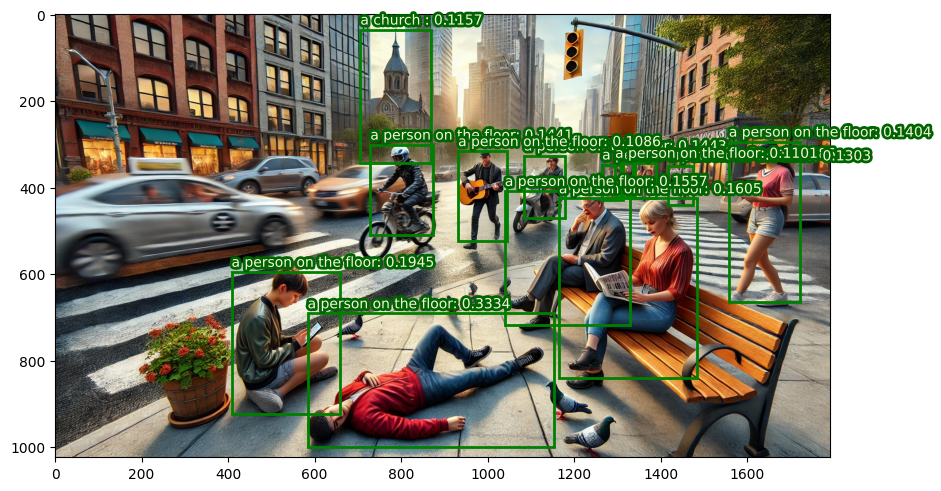

In [1]:
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.patheffects as pe


from transformers import pipeline

# Pfad zu Bild ändern
image = Image.open("images/street_scene.jpg")


def preprocess_outputs(output):
    input_scores = [x["score"] for x in output]
    input_labels = [x["label"] for x in output]
    input_boxes = []
    for i in range(len(output)):
        input_boxes.append([*output[i]["box"].values()])
    input_boxes = [input_boxes]
    return input_scores, input_labels, input_boxes


def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(
        plt.Rectangle((x0, y0), w, h, edgecolor="green", facecolor=(0, 0, 0, 0), lw=2)
    )


def show_boxes_and_labels_on_image(raw_image, boxes, labels, scores):
    plt.figure(figsize=(10, 10))
    plt.imshow(raw_image)
    for i, box in enumerate(boxes):
        show_box(box, plt.gca())
        plt.text(
            x=box[0],
            y=box[1] - 12,
            s=f"{labels[i]}: {scores[i]:,.4f}",
            c="beige",
            path_effects=[pe.withStroke(linewidth=4, foreground="darkgreen")],
        )
    plt.axis("on")
    plt.show()

OWL_checkpoint = "google/owlvit-base-patch32"

text = ["a person on the floor", "a church "]

# Load the model
detector = pipeline(
    model= OWL_checkpoint,
    task="zero-shot-object-detection"
)

output = detector(
    image,
    candidate_labels = text
)

print(output)

input_scores, input_labels, input_boxes = preprocess_outputs(output)

# Show the image with the bounding boxes
show_boxes_and_labels_on_image(
    image,
    input_boxes[0],
    input_labels,
    input_scores
)
